# Visualization

In [1]:
import pandas as pd

## A note on viewing output

When we create a variable and then put that on the last line of a cell, jupyter
*displays* it.

In [2]:
name = 'sarah'
name

'sarah'

How it displays it depends on the type

In [3]:
type(name)

str

For a string, it uses `print`

In [4]:
print(name)

sarah


so this and the one above look the same.  For objects that have a `_repr_html_`
method, jupyter uses that, and then your brownser uses html to render the object
in a more visually appealing way.

## Review from Monday

We will load the robusta data briefly again.

In [5]:
robusta_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv'

Is the robusta coffee's Mouthfeel or Aftertaste rated more consistently

In [6]:
robusta_df = pd.read_csv(robusta_data_url)
robusta_df.describe()

,Unnamed: 0,Number.of.Bags,Harvest.Year,Fragrance...Aroma,Flavor,Aftertaste,Salt...Acid,Bitter...Sweet,Mouthfeel,Uniform.Cup,...,Balance,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,25.00000,25.000000,25.000000
mean,14.500000,168.000000,2013.964286,7.702500,7.630714,7.559643,7.657143,7.675714,7.506786,9.904286,...,7.541786,7.761429,80.868929,0.065714,2.964286,0.0,1.892857,1367.60000,1387.600000,1377.600000
std,8.225975,143.226317,1.346660,0.296156,0.303656,0.342469,0.261773,0.317063,0.725152,0.238753,...,0.526076,0.330507,2.441233,0.058464,12.357280,0.0,2.601129,838.06205,831.884207,833.980216
min,1.000000,1.000000,2012.000000,6.750000,6.670000,6.500000,6.830000,6.670000,5.080000,9.330000,...,5.250000,6.920000,73.750000,0.000000,0.000000,0.0,0.000000,40.00000,40.000000,40.000000
25%,7.750000,1.000000,2013.000000,7.580000,7.560000,7.397500,7.560000,7.580000,7.500000,10.000000,...,7.500000,7.580000,80.170000,0.000000,0.000000,0.0,0.000000,795.00000,795.000000,795.000000
50%,14.500000,170.000000,2014.000000,7.670000,7.710000,7.670000,7.710000,7.750000,7.670000,10.000000,...,7.670000,7.830000,81.500000,0.100000,0.000000,0.0,1.000000,1095.00000,1200.000000,1100.000000
75%,21.250000,320.000000,2015.000000,7.920000,7.830000,7.770000,7.830000,7.830000,7.830000,10.000000,...,7.830000,7.920000,82.520000,0.120000,0.000000,0.0,2.000000,1488.00000,1488.000000,1488.000000
max,28.000000,320.000000,2017.000000,8.330000,8.080000,7.920000,8.000000,8.420000,8.250000,10.000000,...,8.000000,8.580000,83.750000,0.130000,63.000000,0.0,9.000000,3170.00000,3170.000000,3170.000000


from the lower `std` we can see that Aftertaste is more consistently rated.

<AxesSubplot: ylabel='Frequency'>

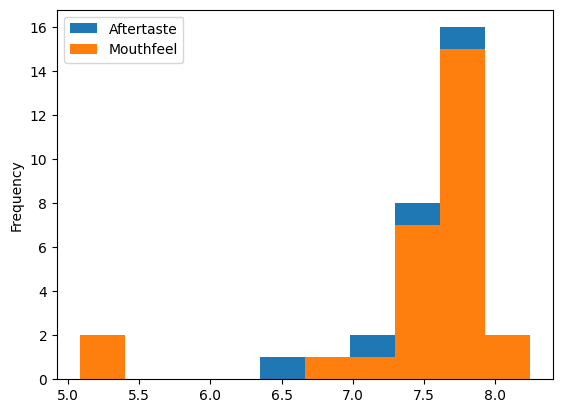

In [7]:
robusta_df[['Aftertaste','Mouthfeel']].plot(kind='hist')

We can change the kind, for example to a [Kernel Density Estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation).
This approximates the distribution of the data, you can think of it rougly like
a smoothed out histogram.

<AxesSubplot: ylabel='Density'>

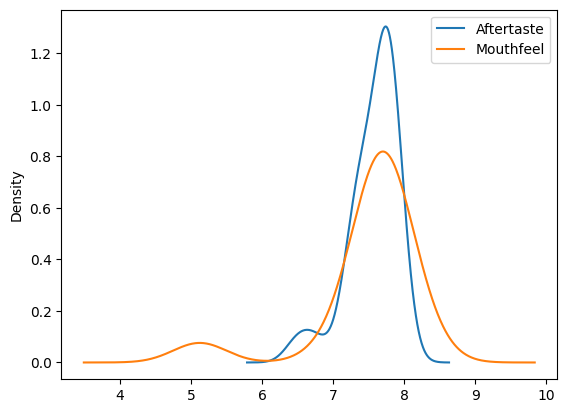

In [8]:
robusta_df[['Aftertaste','Mouthfeel']].plot(kind='kde')

This version makess it more visually clear that the the Aftertaste is more consistently, but it also helps us see that that might not be the whole story.  Both have a second smaller bump, so the overall std might not be the best measure.

```{admonition} Question from class
Why do we need two sets of brackets?
```

It tries to use them to index in multiple ways instead.

In [9]:
robusta_df['Aftertaste','Mouthfeel']

KeyError: ('Aftertaste', 'Mouthfeel')

It tries to look for a [multiindex](https://pandas.pydata.org/docs/user_guide/advanced.html#hierarchical-indexing-multiindex), but we do not have one so it fails.  THe second square brackets, makes it a list of names to use and  pandas looks for them sequentially.

## Comparing two datasets


we're going to work with the arabica data today, because it's a little bigger
and more interesting for plotting

In [10]:
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'
arabica_df = pd.read_csv(arabica_data_url,index_col=0)

It is mostly the same columns as the robusta data

In [11]:
arabica_df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [12]:
robusta_df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Fragrance...Aroma', 'Flavor', 'Aftertaste',
       'Salt...Acid', 'Bitter...Sweet', 'Mouthfeel', 'Uniform.Cup',
       'Clean.Cup', 'Balance', 'Cupper.Points', 'Total.Cup.Points', 'Moisture',
       'Category.One.Defects', 'Quakers', 'Color', 'Category.Two.Defects',
       'Expiration', 'Certification.Body', 'Certification.Address',
       'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

but it has a lot more rows

In [13]:
len(arabica_df) - len(robusta_df)

1283

In [14]:
arabica_df.shape, robusta_df.shape

((1311, 43), (28, 44))

## Plotting in Python

- [matplotlib](https://matplotlib.org/): low level plotting tools
- [seaborn](https://seaborn.pydata.org/index.html): high level plotting with opinionated defaults
- [ggplot](https://yhat.github.io/ggpy/): plotting based on the ggplot library in R.


Pandas and seaborn use matplotlib under the hood.

````{margin}
```{admonition}  Think Ahead
Learning ggplot is a way to earn level 3 for visualize
```
````
Seaborn and ggplot both assume the data is set up as a DataFrame.
Getting started with seaborn is the simplest, so we'll use that.

In [15]:
import seaborn as sns

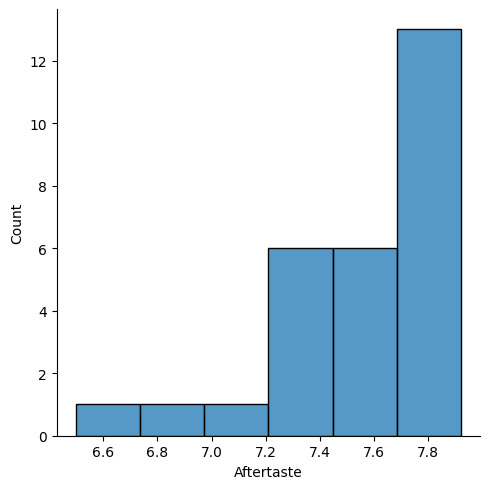

In [16]:
sns.displot(data = robusta_df, x='Aftertaste')

In [17]:
sns.displot(data = robusta_df, x='Moutfeel')

ValueError: Could not interpret value `Moutfeel` for parameter `x`

to plot these together with seaborn we have to transform the DataFrame, so we will see that next year.

### how are flavor and balance related?

<AxesSubplot: xlabel='Flavor', ylabel='Balance'>

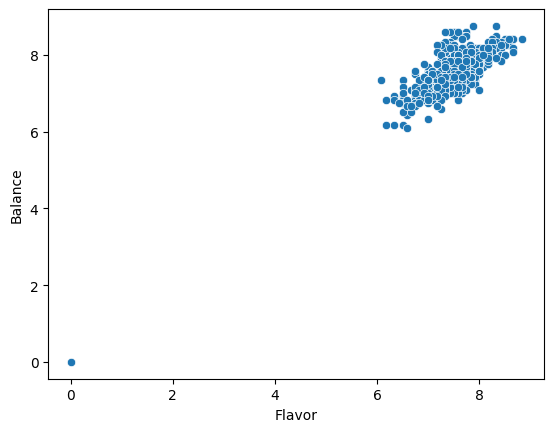

In [18]:
sns.scatterplot(data=arabica_df,x='Flavor',y='Balance')

But now we have more power to investigate more relationships in the data.

<AxesSubplot: xlabel='Flavor', ylabel='Balance'>

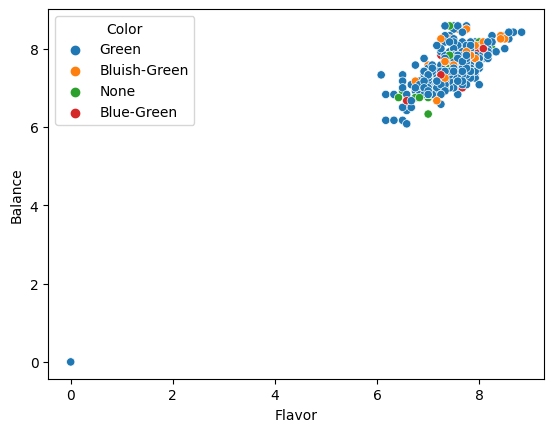

In [19]:
sns.scatterplot(data=arabica_df,x='Flavor',y='Balance',hue='Color')

From this we can see that the color doesn't appear to be related to the flavor
or balance scores, but that the flavor and balacne are related.

<AxesSubplot: xlabel='Flavor', ylabel='Balance'>

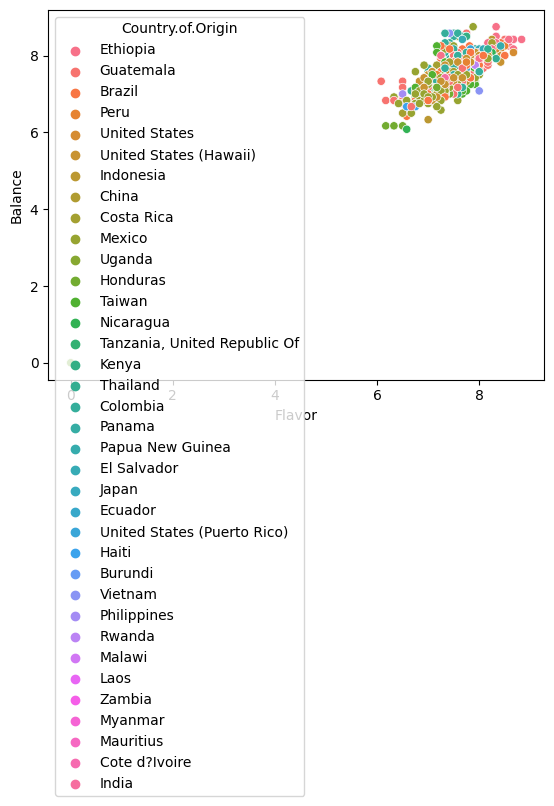

In [20]:
sns.scatterplot(data=arabica_df,x='Flavor',y='Balance',
                hue='Country.of.Origin')

We can also break this apart. `lmplot` is a higher level plotting function so
it allows us to create grids of plots and by default also includes a regression
line.

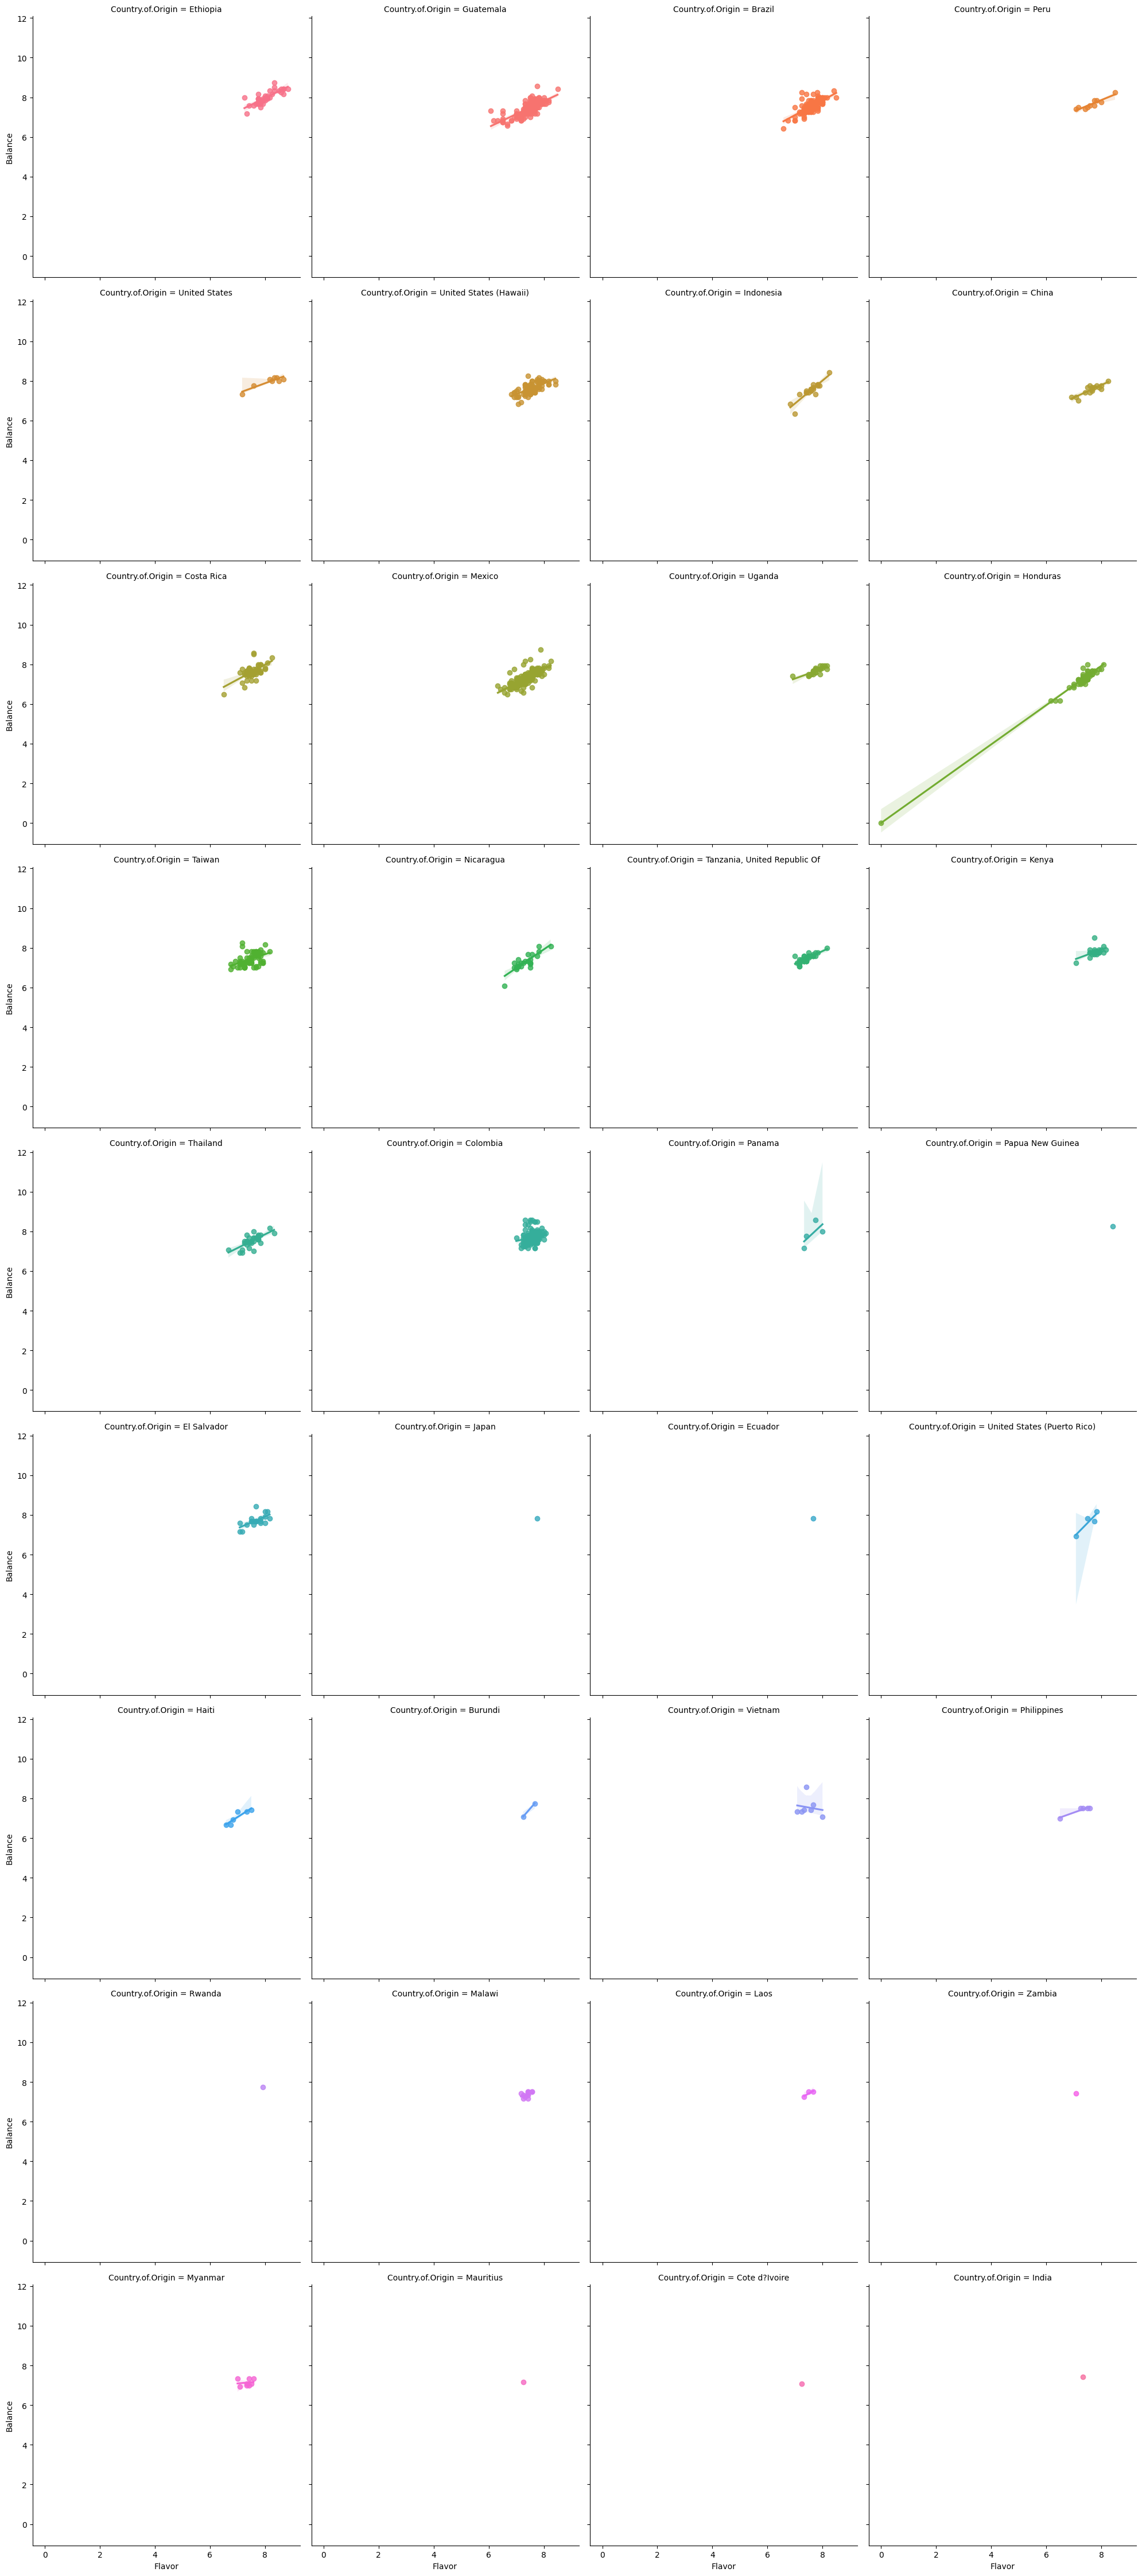

In [21]:
sns.lmplot(data=arabica_df,x='Flavor',y='Balance',
                hue='Country.of.Origin',col='Country.of.Origin',
          col_wrap=4)

If we were not interested in the regression line, we could turn that off for now, with `,fit_reg=False`.

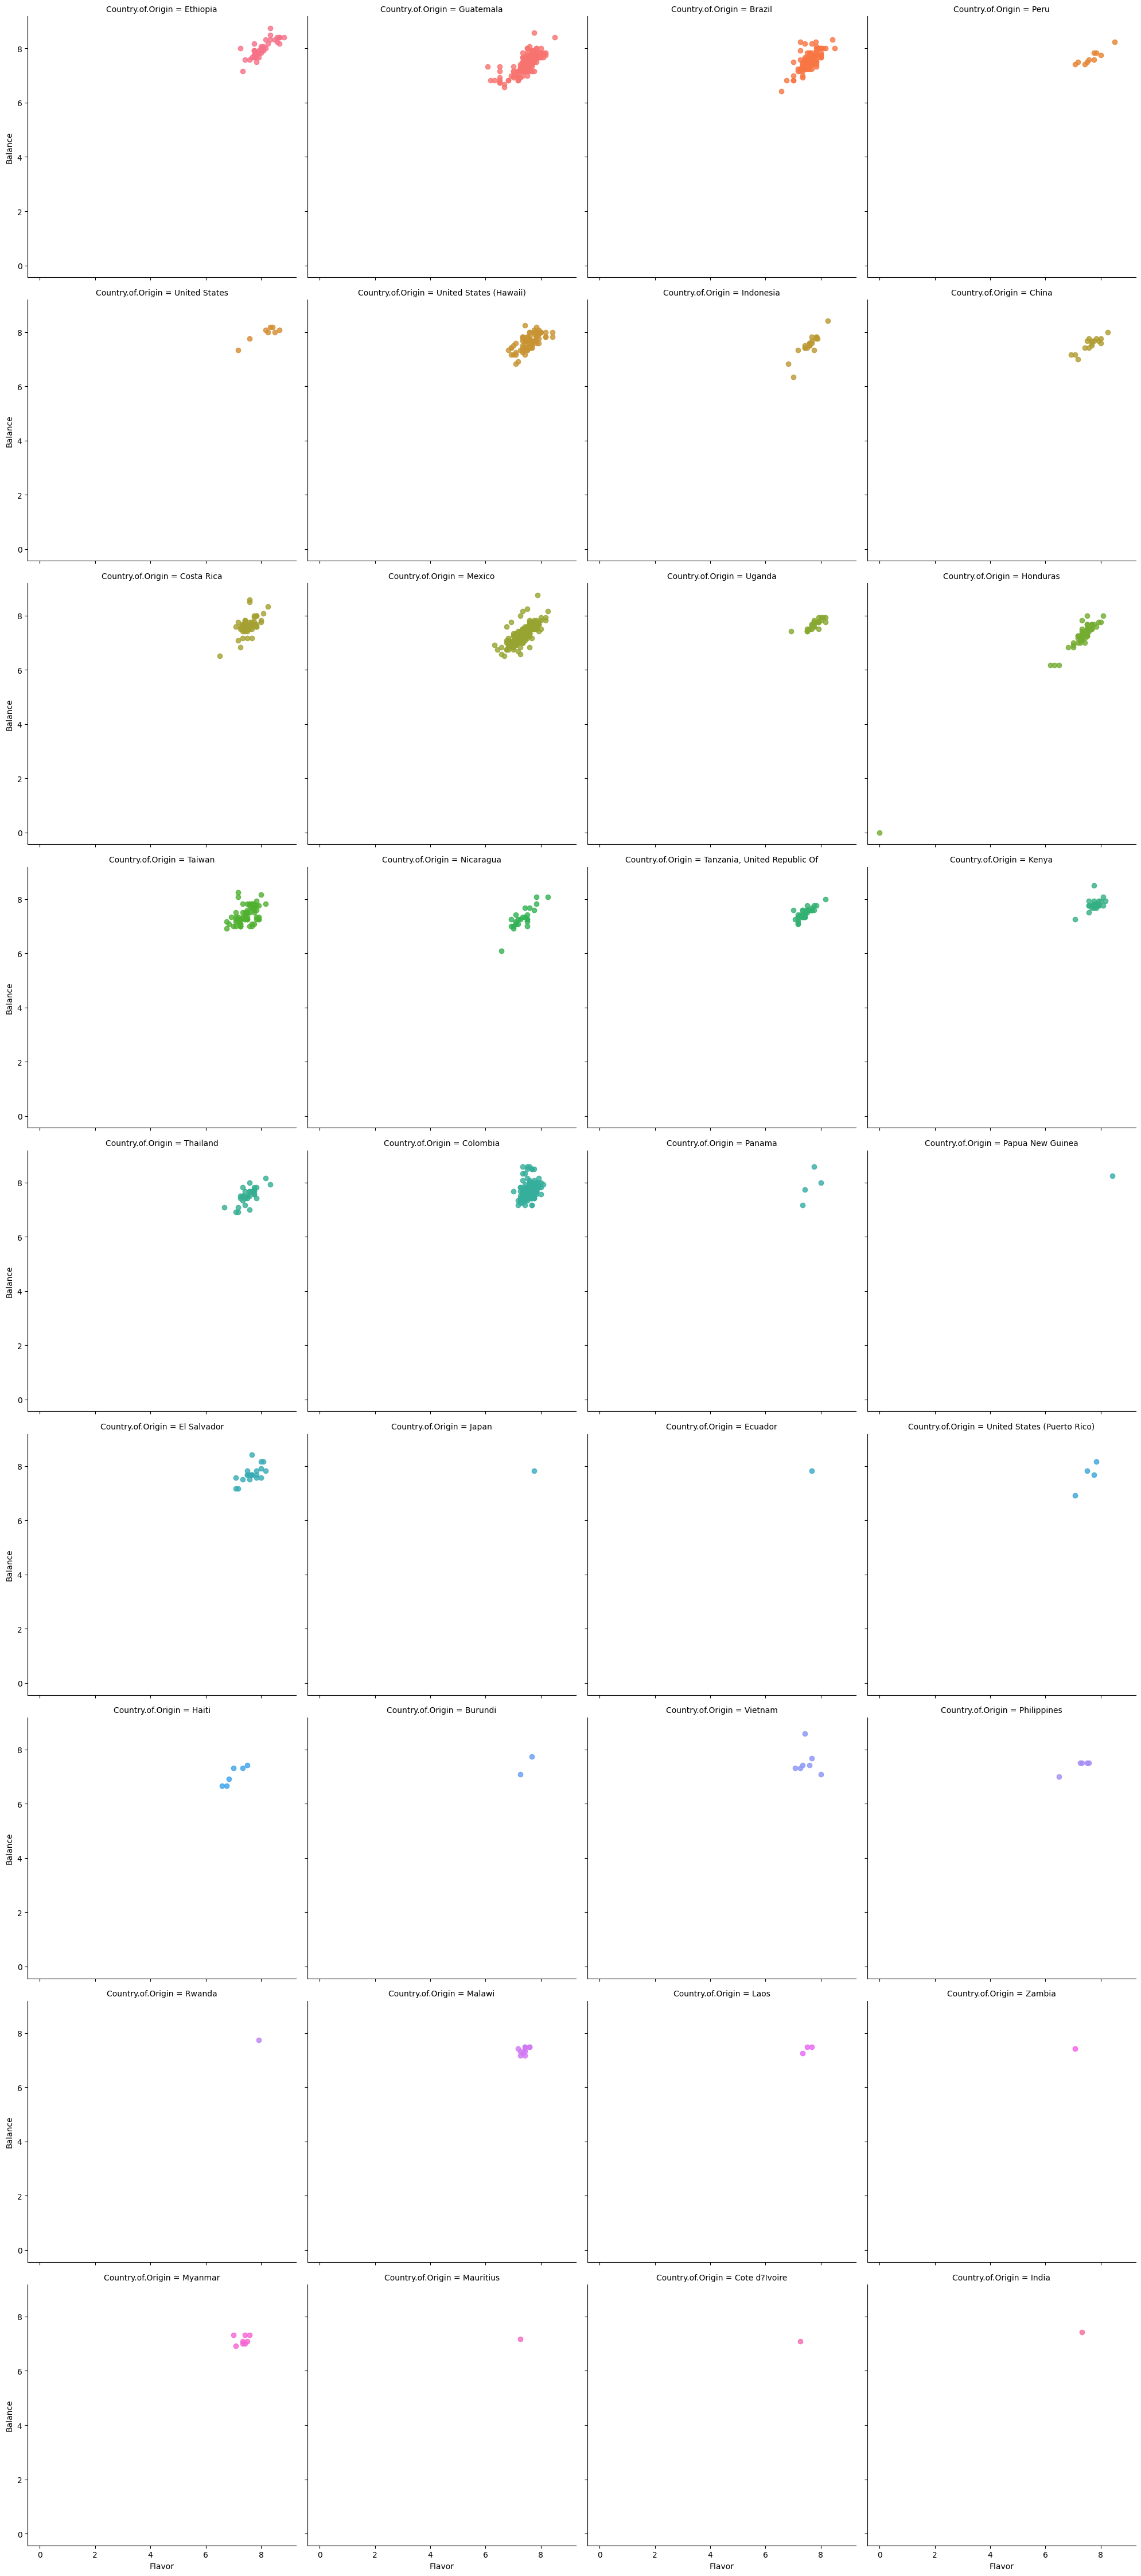

In [22]:
sns.lmplot(data=arabica_df,x='Flavor',y='Balance',
                hue='Country.of.Origin',col='Country.of.Origin',
          col_wrap=4,fit_reg=False)

## Things you want to know more about


### Things we will touch Friday

- more parameters and capabilities for seaborn
- how to analyze a graph

### Things that you could study for level 3

- The little details about the plot functions
- More things that you can do with seaborn, like how to manipulate the scatterplots more
- More ways to create unique plots and charts (we'll give you a bit more depth but all the way here will be a level 3 task)
- One thing I want to learn based on what's learned so far is if we can compare graphs explicitly.


### Things we will do later

#### Plotting data from multiple datasets on the same graphs (considering they share the same data points)

This will require being able to combine datasets into a single DataFrame, because a single plot funciton will require


### Graphing lines of best fit onto graphs (but not just linear models, quadratic or other types as well)

We will learn how to fit models in general when we get to regression, but ultimately quadratic and other polynomial plots will also be a level 3 exploration you can do. We will get you to the point in class of all the pieces, but you will have to swap in some alternative parametrs

### How to remove outliers or other data.

When we saw indexing we got really close to this, and we will do more when we clean data next week.